## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# the new_page and treatment don't line up
mis_grp1 = df.query('group == "treatment" & landing_page == "old_page"')
len(mis_grp1)

# the control group users lands on new_page
mis_grp2 = df.query('group == "control" & landing_page == "new_page"')
len(mis_grp2)

# number of times the new_page and treatment don't line up is sum of above two values
len(mis_grp1) + len(mis_grp2)

3893

f. Do any of the rows have missing values?

In [7]:
# we check number of values in each rows using info function
# entry values denote if any column has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Delete rows
# drop rows for mismatched treatment rows
df.drop(df.query('group == "treatment" and landing_page == "old_page"').index, inplace=True)
# drop rows for mistmatched control rows
df.drop(df.query('group == "control" and landing_page == "new_page"').index, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# save the cleaned dataset to a new csv file
df.to_csv('ab_new_data.csv', index=False)

In [11]:
df2 = pd.read_csv('ab_new_data.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# check the replicated user_id in df2
# we know that one user id is repeated due to difference between userids and unique ids
sum(df2['user_id'].duplicated())

1

In [15]:
# inspect duplicate userid
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
# investigate the detailed row information
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
# delete duplicated record
# we choose to delete the one with timestamp as '2017-01-09 ...'
time_dup = '2017-01-09 05:37:58.781806'
df2 = df2[df2.timestamp != time_dup]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# because converted values are 1 and 0, the mean value eq to the converting probability
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# first group the columns using 'groupby' function and store in dr_grp
# then compute the statistics of the df_grp
# since the converted values are boolean values, the mean value represent the probability
df_grp = df2.groupby('group')
df_grp.describe()

user_id                                                    \
              count           mean           std       min        25%   
group                                                                   
control    145274.0  788164.072594  91287.914601  630002.0  709279.50   
treatment  145310.0  787845.719290  91161.564429  630000.0  708745.75   

                                         converted                           \
                50%        75%       max     count      mean       std  min   
group                                                                         
control    788128.5  867208.25  945998.0  145274.0  0.120386  0.325414  0.0   
treatment  787876.0  866718.75  945999.0  145310.0  0.118808  0.323564  0.0   

                               
           25%  50%  75%  max  
group                          
control    0.0  0.0  0.0  1.0  
treatment  0.0  0.0  0.0  1.0

***The probability of the individual converted in the control group is 0.120386***

c. Given that an individual was in the `treatment` group, what is the probability they converted?

***The probability of the individual converted in the treatment group is 0.118808***

d. What is the probability that an individual received the new page?

In [20]:
# the individuals who received the new page also belong to the 'treatment' group
# number of treatment / the total number of individuals represent the wanted probability
len(df2.query('group == "treatment"')) / df2.shape[0]

0.5000619442226688

***The probability of an individual received the new page is 0.5000619442226688***

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Given that the probability of an individual converted in the control group is 0.120386**

**Given that the probability of an individual converted in the treatment group is 0.118808**

**And around half of the individuals received treatment**

**Based on the data, the control group showed higher converted probability compare to the new treatment page group, although the difference is small.**

**There doesnot have sufficient evidence to conclude that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H0: p_{old} - p_{new} \geq 0$$**
**$$H1: p_{old} - p_{new} < 0$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [32]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [33]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [34]:
# the number of the customers received new_pages
n_new = len(df2.query('group == "treatment"'))
print(n_new)

145310


d. What is $n_{old}$?

In [35]:
# the number of the customers received old_pages
n_old = len(df2.query('group == "control"'))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [36]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print(len(new_page_converted)) # code to check the values

145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print(len(old_page_converted)) # code to check the values

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [38]:
# because old_page_converted and new_page_converted have different size,
# we need to make the two sets have the same sample numbers before 
# compute the diff value
# because the new_page_converted has more numbers, I decide to cut it to the
# same sample size as old_page_converted
new_page_converted = new_page_converted[:145274]

# both new_page_converted and old_page_converted have the same size now

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
# compute the probability of new_page_converted in n_new total numbers
#p_new = new_page_converted / n_new 
# compute the probability of old_page_converted in n_old total numbers
#p_old = old_page_converted / n_old

p_diff = (new_page_converted / n_new) - (old_page_converted / n_old)
print(p_diff)
# the observed p_diff 

[-6.8835442e-06  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


In [ ]:
# simulate 10,000 times 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

#p_diffs


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [ ]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10k simulated p_diffs')


NameError: name 'act_diff' is not defined

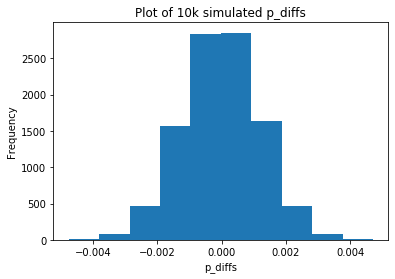

In [31]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10k simulated p_diffs')
df2.query('group == "treatment" & converted == 1').shape[0] / df2.query('group == "control"').shape[0]
plt.axvline(x=act_diff, color='red');
plt.show()

With the **null simulated distribution** of the histogram, the mean of the distribution falls right at the zero. However, the **actual conversion rate** observed from the dataset is not far from the null distribution mean, which indicates **there is a lack of statistical departure from the null hypothesis.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
# compute the difference from the original ab_data.csv dataset
act_diff = df[df['group']=='treatment']['converted'].mean() - df[df['group']=='control']['converted'].mean()
act_diff

-0.0015790565976871451

In [84]:
# an alternative approach to compute the actual difference in ab_data.csv
act_diff2 = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
act_diff2

-0.0015790565976871451

In [85]:
# convert the computed p_diffs to numpy array
# an array is an ordered collection of items, where each item inside the array has an index
# a list is a collection of items (called nodes) ordered in a linear sequence
# the structure of the list doesn't support numeric index like an array is
# and, the elements in a list don't need to allocated next to each other 
# in the memory like an array is

p_diffs = np.array(p_diffs)
p_diffs

array([-0.00123403, -0.00031193, -0.00072497, ...,  0.00122988,
       -0.00289997, -0.00109638])

In [86]:
# proportion of p_diffs greater than the actual difference
# observed in ab_data.csv is computed
(act_diff < p_diffs).mean()

0.9066

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just computed the p_value in part j.**

**p_value is the probability of observing out statistic if the Null Hypothesis is true.**
**The more extreme in favor of the alternative portion of this statement determines the shading area associated with the computed p_value.**

***The computed p_value is 0.9028 which indicates we should accept the Null Hypothesis. The old and new pages performs almost the same. The act_diff value indicates the old pages performed slightly better.***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [87]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [88]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [89]:
from scipy.stats import norm

# tell us how significant our z_score is
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate
print(norm.ppf(1-(0.05))) 
# tells us what our critical value at 95% confidence is
# we take the 95% values as specified in Part II. 1

0.9050583127590245
1.6448536269514722


**This part used the built-in codes in sm to compute the z-score from the z-tests.**

**z_score is a numeric measurement used in statistics of a value's relationship to the mean of a group of values, measured in terms of standard deviation from the mean.**

* We find the z-score 1.3109241984234394 is less than the critical value of 1.6448536269514722 at 95% confidence. Therefore, we accept the Null Hypothesis.
* We find the old pages are only slightly better than the new pages.
* These values agree with the findings in part j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [127]:
# the ab_page column is equivalent to the treatment column base on the description
df2['intercept'] = 1
df2[['drop_this', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('drop_this', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [128]:
import statsmodels.api as sm
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [129]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:03:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [130]:
# the z value is defined as each coefficient divided by its standard error
# individually obtain the p-value 

results.pvalues

intercept    0.000000
ab_page      0.189886
dtype: float64

In [131]:
# also, the inverted exponential of the negative coefficient defines the relationship to 
# the bae variable, the control
1 / np.exp(-0.0150)

1.015113064615719

**Interpretation:** for each 1 unit decrease in the treatment (users landing on new pages), the users' conversion rate is 1.015 times as likely holding all else constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_value associated with ab_page is 0.190,** which makes the coefficient of -0.015 statistically insignificant, given that the threshold is set to be 5%. **The inverted exponential of the negative coefficient** suggests the **users on the old pages** are around **1.015 more likely to convert** on average than users on the new page.

**The null and alternative hypotheses here is:**

$$H0: p_{new} - p_{old} = 0$$
$$H1: p_{new} - p_{old} \neq 0$$

The **Null Hypothesis** for the above circumstance would be that the old page provides **the same conversion rate** as the new page. The **Alternative Hypothesis** would be that the old and new pages **have different conversion rates**. In **Part II**, the **Null Hypothesis** is the **old page is bettern than the new page**, and the **Alternative Hypothesis** is the **new page is better than the old one**.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answers:**

* It is necessary to consider adding other factors into the regression model since they might also contributed to the conversions of the students. For instance, students from different age groups might responded differently. Therefore, after adding the aging factor might result in different results. 
* The gender difference, the students' different family backgrounds, their prior academic backgrounds, and the different courses all might influenced the experience, then untimately contributed to the conversions. 
* The disadvantages of adding additional factors to the regression model is that even if we add factors that we cannot account for, they still influence the final outcome. Besides, it will be easier and more practical to work less factors than including too many factors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [132]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [135]:
# exhibit the unique values in the country column
countries_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [136]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [137]:
# create the necessary dummy variables
# create columns of 'CA', 'US', and 'UK' for the three dummy variables
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country'])[['CA', 'US', 'UK']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1


In [138]:
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [139]:
### Fit Your Linear Model And Obtain the Results
# the 'intercept' column has been added into the dataset already

df_new['intercept'] = 1
log_m = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US']])
results = log_m.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Apr 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:07:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [140]:
# to interpret the results, first we need to exponentiate each of the coefficient value

np.exp(results.params)

intercept    0.138154
ab_page      0.985168
CA           0.950621
US           0.990165
dtype: float64

In [144]:
1 / np.exp(results.params)

intercept    7.238314
ab_page      1.015056
CA           1.051944
US           1.009932
dtype: float64

**Interpretation:**
* ab_page value represents for each 1 unit decrease in treatment, the converstion rate is 1.015 times as likely holding all else constant;
* CA value represents for each 1 unit decrease in users from CA, the conversion rate is 1.052 times as likely holding all else constant;
* US value represents for each 1 unit decrease in users from US, the conversion rate is 1.010 times as likely holding all else constant.

**Interpretation:** for each 1 unit decrease in the CA and US's customers conversion rate, the UK customers' conversion rate is 1.05 and 1.01 times as likely holding all else constant.

In [143]:
results.pvalues

intercept    0.000000
ab_page      0.191245
CA           0.074500
US           0.457282
dtype: float64

**Interpretation:**

Each of the **p_values** showed above are **larger than 0.05**, indicating **no statistical significant correlation** between the conversion rate and the users' residing countries.

**Conclusions from the Logistic Regression:**

* The Logistic Regression model indicates that base on the p_values, the users' residing countries and the type of page the users landed do not provide a statistical significance to reject the null hypotheses, given a Type I error rate at 5%.

* We can stay with the old page.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.